In [10]:
dataSetPath = "/home/asif/DBMS-II/SkinDetection/ibtd"
n = 256
skinPixel = [[ [0 for col in range(n)] for col in range(n)] for row in range(n)] 
nonSkinPixel = [[ [0 for col in range(n)] for col in range(n)] for row in range(n)]
learning_ratio = [[ [0 for col in range(n)] for col in range(n)] for row in range(n)]  

In [6]:
import numpy
from PIL import Image

def get_image_pixels(image_path):
    """Get a numpy array of an image so that one can access values[x][y]."""
    image = Image.open(image_path, "r")
    width, height = image.size
    pixel_values = list(image.getdata())
    if image.mode == "RGB":
        channels = 3
    elif image.mode == "L":
        channels = 1
    else:
        print("Unknown mode: %s" % image.mode)
        return None
    pixel_values = numpy.array(pixel_values).reshape((width, height, channels))
    return pixel_values

def get_image_size(image_path):
    image = Image.open(image_path, "r")
    width, height = image.size
    return width, height

In [7]:
indices = ["%04d" % x for x in range(1000)]

In [11]:
for image_index in range(555):
  unmask_img_path = dataSetPath+"/"+str(indices[image_index])+".jpg"
  mask_img_path = dataSetPath+"/Mask/"+str(indices[image_index])+".bmp"
  
  unmask_img = get_image_pixels(unmask_img_path)
  mask_img = get_image_pixels(mask_img_path)
  width, height = get_image_size(mask_img_path)

  
  for x in range(width):
    for y in range(height):
      r = mask_img[x][y][0]
      g = mask_img[x][y][1]
      b = mask_img[x][y][2]

      if r>250 and g>250 and b>250:
        r = unmask_img[x][y][0]
        g = unmask_img[x][y][1]
        b = unmask_img[x][y][2]
        nonSkinPixel[r][g][b] = nonSkinPixel[r][g][b] + 1
      else:
        skinPixel[r][g][b] = skinPixel[r][g][b] + 1

In [12]:
skinPixelSum = 0
nonSkinPixelSum = 0

for i in range(255):
  for j in range(255):
    skinPixelSum += sum(skinPixel[x][y])
    nonSkinPixelSum += sum(nonSkinPixel[x][y])

print(skinPixelSum)
print(nonSkinPixelSum)

200277000
175502475


In [17]:
T = 0.4
test_image_path = dataSetPath+"/0000.jpg"
test_image = get_image_pixels(test_image_path)
width, heigth = get_image_size(test_image_path)

for x in range(width):
  for y in range(heigth):
    r=test_image[x][y][0]
    g=test_image[x][y][1]
    b=test_image[x][y][2]

    if abs(learning_ratio[r][g][b])<T:
      test_image[x][y][0] = 255
      test_image[x][y][1] = 255
      test_image[x][y][2] = 255

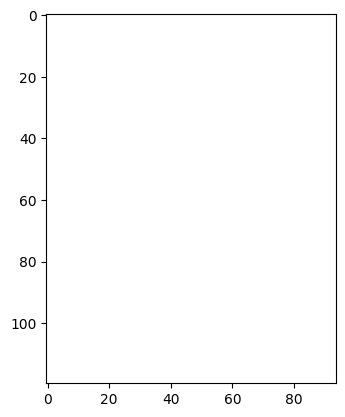

In [18]:
import matplotlib.pyplot as plt
plt.imshow(test_image)